In [130]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
import math
import collections
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from datetime import datetime,timedelta

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"  # default last_expr

In [17]:
path=r"D:/Documents/graduate/application/pre-doc/Kraft"

In [131]:
df1=pd.read_csv(path+r"/dealership_purchases.csv")
df1.describe()
df1

,vehicle_ID,aquisition_cost
count,412919.000000,412919.000000
mean,206460.000000,9862.012528
std,119199.592239,5324.974477
min,1.000000,0.010000
25%,103230.500000,7529.410000
50%,206460.000000,9000.000000
75%,309689.500000,10500.000000
max,412919.000000,900020.000000


,vehicle_ID,aquisition_cost,aquisition_date
0,1,9500.0,2014-09-02
1,2,8500.0,2014-09-02
2,3,5700.0,2014-09-02
3,4,8000.0,2014-09-02
4,5,6655.0,2014-09-02
...,...,...,...
412914,412915,10000.0,2021-12-07
412915,412916,8500.0,2021-12-07
412916,412917,6500.0,2021-12-07
412917,412918,5500.0,2021-12-07


In [132]:
df2=pd.read_csv(path+r"/dealership_sales.csv")
df2.describe()
df2

,vehicle_ID,sales_price,odometer_reading
count,412919.000000,412919.000000,412919.000000
mean,206460.000000,12086.509595,67555.123676
std,119199.592239,846.129661,34267.314777
min,1.000000,10500.010000,501.000000
25%,103230.500000,11386.000000,44053.500000
50%,206460.000000,12000.000000,64811.000000
75%,309689.500000,12888.000000,86897.000000
max,412919.000000,13499.990000,977356.000000


,vehicle_ID,sales_price,odometer_reading,sale_date
0,1,13365.00,78025.0,2014-10-06
1,2,11144.00,47978.0,2014-10-15
2,3,12540.00,120372.0,2014-09-02
3,4,11113.00,91282.0,2014-10-02
4,5,10700.00,59408.0,2014-09-19
...,...,...,...,...
412914,412915,12995.00,76305.0,2021-12-07
412915,412916,12592.71,100982.0,2021-12-07
412916,412917,13196.58,175578.0,2021-12-07
412917,412918,10600.00,76067.0,2021-12-07


In [133]:
df3=pd.read_csv(path+r"/vehicle_information.csv")
df3.describe()
df3

,vehicle_ID,make_ID,model_ID,model_year
count,412919.000000,412919.000000,412919.000000,412914.000000
mean,206460.000000,34.940911,417.853092,2012.817996
std,119199.592239,19.269252,258.937813,2.720135
min,1.000000,1.000000,1.000000,1980.000000
25%,103230.500000,21.000000,169.000000,2011.000000
50%,206460.000000,30.000000,371.000000,2013.000000
75%,309689.500000,52.000000,656.000000,2015.000000
max,412919.000000,73.000000,942.000000,2022.000000


,vehicle_ID,make_ID,model_ID,model_year
0,1,67,124,2011.0
1,2,67,927,2010.0
2,3,9,885,2005.0
3,4,52,682,2008.0
4,5,34,475,2006.0
...,...,...,...,...
412914,412915,67,169,2016.0
412915,412916,9,883,2014.0
412916,412917,52,85,2011.0
412917,412918,64,483,2012.0


In [134]:
df=df1.merge(df2,on='vehicle_ID', how='outer').merge(df3,on='vehicle_ID', how='outer')
df

,vehicle_ID,aquisition_cost,aquisition_date,sales_price,odometer_reading,sale_date,make_ID,model_ID,model_year
0,1,9500.0,2014-09-02,13365.00,78025.0,2014-10-06,67,124,2011.0
1,2,8500.0,2014-09-02,11144.00,47978.0,2014-10-15,67,927,2010.0
2,3,5700.0,2014-09-02,12540.00,120372.0,2014-09-02,9,885,2005.0
3,4,8000.0,2014-09-02,11113.00,91282.0,2014-10-02,52,682,2008.0
4,5,6655.0,2014-09-02,10700.00,59408.0,2014-09-19,34,475,2006.0
...,...,...,...,...,...,...,...,...,...
412914,412915,10000.0,2021-12-07,12995.00,76305.0,2021-12-07,67,169,2016.0
412915,412916,8500.0,2021-12-07,12592.71,100982.0,2021-12-07,9,883,2014.0
412916,412917,6500.0,2021-12-07,13196.58,175578.0,2021-12-07,52,85,2011.0
412917,412918,5500.0,2021-12-07,10600.00,76067.0,2021-12-07,64,483,2012.0


# Summarizing

In [135]:
##task1
type(df['aquisition_date'][0])
df['aquisition_date']=df['aquisition_date'].apply(lambda x:  datetime.strptime(x,'%Y-%m-%d'))
df['sale_date']=df['sale_date'].apply(lambda x:  datetime.strptime(x,'%Y-%m-%d'))
type(df['aquisition_date'][0])

str

pandas._libs.tslibs.timestamps.Timestamp

In [136]:
##task2
df['timedelta']=df['sale_date']-df['aquisition_date']
len(df[df['timedelta']>=timedelta(days=183)])
len(df[df['timedelta']>=timedelta(days=183)])/len(df)

18445

0.04466977784989308

In [ ]:
##task2
df.drop(df[df['timedelta']>=timedelta(days=183)].index, axis=0,inplace=True)

In [113]:
summary=df.describe().loc[['mean','std','min','max'],['sales_price','aquisition_cost','model_year','odometer_reading']]
summary=summary.applymap(lambda x: "{:.2f}".format(x))

summary.to_excel(path+r"/summary2.xlsx")
summary.to_latex(path+r"/summary2.tex")

In [115]:
##task3
temp=pd.DataFrame(collections.Counter(df['make_ID']).most_common(5),columns=['Make_ID','Frequency'])
temp.to_excel(path+r"/summary3_1.xlsx")
temp.to_latex(path+r"/summary3_1.tex")
temp=pd.DataFrame(collections.Counter(df['model_ID']).most_common(5),columns=['Model_ID','Frequency'])
temp.to_latex(path+r"/summary3_2.tex")

(array([  826.,  1337.,  1106.,  1482.,   879.,  1411.,  2615.,   771.,
          841.,  1203.,   751.,   888.,  1595.,  2096.,   878.,   802.,
         1894.,   834.,  1278.,  3479.,   811.,   839.,   828.,  1144.,
          897.,  2005.,  4049.,   964.,  1101.,  1949.,  1196.,  2205.,
        13903., 11659.,  1366.,   990.,  1068.,   750.,   747.,  1673.,
          625.,   834.,   812.,   998.,   818.,  1457.,  2380.,   807.,
          880.,  1848.,   828.,  1025.,  1849.,  2335.,   860.,   817.,
         1101.,   812.,  1125.,  3094.,   835.,   950.,   969.,  1584.,
         1593.,  3029., 10313.,   908.,   945.,  1183.,   889.,  1037.,
         1897.,  2476.,   790.,   749.,  1261.,   839.,  1229.,  3334.,
          857.,   944.,  1059.,  1978.,  1057.,  1798.,  3377.,   776.,
          859.,  1411.,   932.,  1463.,  2714.,  3965.,  1453.,  1861.,
         2698.,  1958.,  3454., 17823.,  7532.,   750.,   757.,   958.,
          741.,   971.,  1774.,   804.,   952.,  1126.,  1126., 

Text(0.5, 0, 'Sales Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Sales Price of Vehicles')

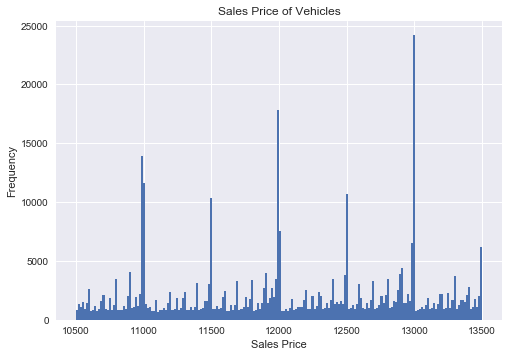

In [27]:
##task4
plt.style.use('seaborn')
plt.hist(x = df['sales_price'].to_list(),bins = 200)
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.title('Sales Price of Vehicles')
plt.savefig(path+r"/summary4.pdf")
plt.show()

In [28]:
##task6
#data source:https://www.txdmv.gov/standard-presumptive-calculator
#Texans who buy a used vehicle from anyone other than a licensed vehicle dealer are required to pay motor vehicle sales tax of 6.25 percent on the purchase price or standard presumptive value (SPV), whichever is the highest value.
df['price_plus_tax']=df['sales_price']*1.0625

(array([  826.,  1337.,  1106.,  1482.,   879.,  1411.,  2615.,   771.,
          841.,  1203.,   751.,   888.,  1595.,  2096.,   878.,   802.,
         1894.,   834.,  1278.,  3479.,   811.,   839.,   828.,  1144.,
          897.,  2005.,  4049.,   964.,  1101.,  1949.,  1196.,  2205.,
        13903., 11659.,  1366.,   990.,  1068.,   750.,   747.,  1673.,
          625.,   834.,   812.,   998.,   818.,  1457.,  2380.,   807.,
          880.,  1848.,   828.,  1025.,  1849.,  2335.,   860.,   817.,
         1101.,   812.,  1125.,  3094.,   835.,   950.,   969.,  1584.,
         1593.,  3029., 10313.,   908.,   945.,  1183.,   889.,  1037.,
         1897.,  2476.,   790.,   749.,  1261.,   839.,  1229.,  3334.,
          857.,   944.,  1059.,  1978.,  1057.,  1798.,  3377.,   776.,
          859.,  1411.,   932.,  1463.,  2714.,  3965.,  1453.,  1861.,
         2698.,  1958.,  3454., 17823.,  7532.,   750.,   757.,   958.,
          741.,   971.,  1774.,   804.,   952.,  1126.,  1126., 

Text(0.5, 0, 'Sales Price')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Sales Price of Vehicles')

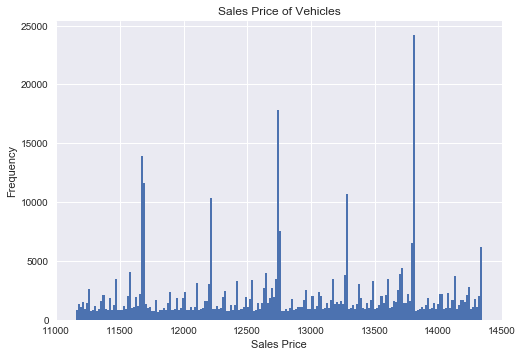

In [29]:
##task7
plt.style.use('seaborn')
plt.hist(x = df['price_plus_tax'].to_list(),bins = 200)
plt.xlabel('Sales Price')
plt.ylabel('Frequency')
plt.title('Sales Price of Vehicles')
plt.savefig(path+r"/summary7.pdf")
plt.show()

# Firm Profits

In [119]:
len(df[df['profit']<= -10000])
len(df[df['profit']<= -10000])/len(df)

9251

0.02345148222696553

Text(0.5, 0, 'Profits')

Text(0, 0.5, 'K-density')

Text(0.5, 1.0, 'Kernel Density Plot of Operating Profit (> -$10,000)')

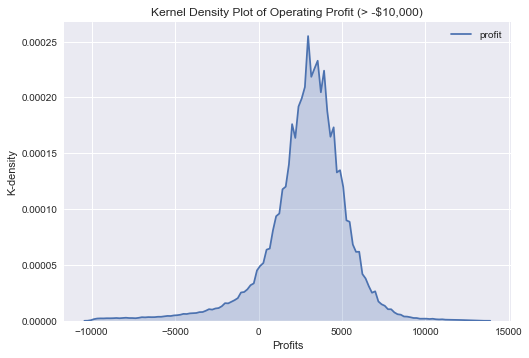

In [30]:
##task1
df['profit']=df['sales_price']-df['aquisition_cost']
sns.kdeplot(df.loc[df['profit']>-10000,'profit'], shade=True)
plt.xlabel('Profits')
plt.ylabel('K-density')
plt.title('Kernel Density Plot of Operating Profit (> -$10,000)')
plt.savefig(path+r"/profit1.pdf")
plt.show()

In [31]:
##task2
df['price_level']=(df['sales_price']-10500)//50
df['price_range']=df['price_level'].apply(lambda x: '\$'+str(10500+x*50)+'-\$'+str(10500+x*50+49))
df

,vehicle_ID,aquisition_cost,aquisition_date,sales_price,odometer_reading,sale_date,make_ID,model_ID,model_year,timedelta,price_plus_tax,profit,price_level,price_range
0,1,9500.0,2014-09-02,13365.00,78025.0,2014-10-06,67,124,2011.0,34 days,14200.312500,3865.00,57.0,\$13350.0-\$13399.0
1,2,8500.0,2014-09-02,11144.00,47978.0,2014-10-15,67,927,2010.0,43 days,11840.500000,2644.00,12.0,\$11100.0-\$11149.0
2,3,5700.0,2014-09-02,12540.00,120372.0,2014-09-02,9,885,2005.0,0 days,13323.750000,6840.00,40.0,\$12500.0-\$12549.0
3,4,8000.0,2014-09-02,11113.00,91282.0,2014-10-02,52,682,2008.0,30 days,11807.562500,3113.00,12.0,\$11100.0-\$11149.0
4,5,6655.0,2014-09-02,10700.00,59408.0,2014-09-19,34,475,2006.0,17 days,11368.750000,4045.00,4.0,\$10700.0-\$10749.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412914,412915,10000.0,2021-12-07,12995.00,76305.0,2021-12-07,67,169,2016.0,0 days,13807.187500,2995.00,49.0,\$12950.0-\$12999.0
412915,412916,8500.0,2021-12-07,12592.71,100982.0,2021-12-07,9,883,2014.0,0 days,13379.754375,4092.71,41.0,\$12550.0-\$12599.0
412916,412917,6500.0,2021-12-07,13196.58,175578.0,2021-12-07,52,85,2011.0,0 days,14021.366250,6696.58,53.0,\$13150.0-\$13199.0
412917,412918,5500.0,2021-12-07,10600.00,76067.0,2021-12-07,64,483,2012.0,0 days,11262.500000,5100.00,2.0,\$10600.0-\$10649.0


In [32]:
select=df.groupby(['price_level','price_range'],as_index=False)
transaction_num=select['vehicle_ID'].count()
aquisition_mean=select['aquisition_cost'].mean()
profit_mean=select['profit'].mean()

In [33]:
##task3
fig_data=transaction_num.merge(aquisition_mean,on=['price_level','price_range'], how='outer').merge(profit_mean,on=['price_level','price_range'], how='outer')
fig_data


,price_level,price_range,vehicle_ID,aquisition_cost,profit
0,0.0,\$10500.0-\$10549.0,3679,8494.650650,2032.340351
1,1.0,\$10550.0-\$10599.0,4929,8155.401595,2423.035462
2,2.0,\$10600.0-\$10649.0,3559,8329.389295,2291.075606
3,3.0,\$10650.0-\$10699.0,4042,8533.669807,2144.463169
4,4.0,\$10700.0-\$10749.0,3983,8533.818288,2185.614723
5,5.0,\$10750.0-\$10799.0,5446,8577.237936,2198.658239
6,6.0,\$10800.0-\$10849.0,4100,8619.634595,2197.746961
7,7.0,\$10850.0-\$10899.0,5154,8559.318877,2320.295479
8,8.0,\$10900.0-\$10949.0,5937,8659.266271,2257.028319
9,9.0,\$10950.0-\$10999.0,22994,8418.033545,2569.873407


(array([10000., 11000., 12000., 13000., 14000.]),
 <a list of 5 Text xticklabel objects>)

(array([ 7000.,  8000.,  9000., 10000., 11000., 12000.]),
 <a list of 6 Text yticklabel objects>)

Text(0.5, 0, 'Sales Price')

Text(0, 0.5, 'Mean Aquisition Cost')

Text(0.5, 1.0, 'Average Aquisition Cost by Sales Price Bucks')

(array([10000., 11000., 12000., 13000., 14000.]),
 <a list of 5 Text xticklabel objects>)

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 <a list of 7 Text yticklabel objects>)

Text(0.5, 0, 'Sales Price')

Text(0, 0.5, 'Transaction Number')

Text(0.5, 1.0, 'Transaction Number by Sales Price Bucks')

(array([10000., 10500., 11000., 11500., 12000., 12500., 13000., 13500.,
        14000.]),
 <a list of 9 Text xticklabel objects>)

(array([1800., 2000., 2200., 2400., 2600., 2800.]),
 <a list of 6 Text yticklabel objects>)

Text(0.5, 0, 'Sales Price')

Text(0, 0.5, 'Mean Operating Profit')

Text(0.5, 1.0, 'Average Operating Profit by Sales Price Bucks')

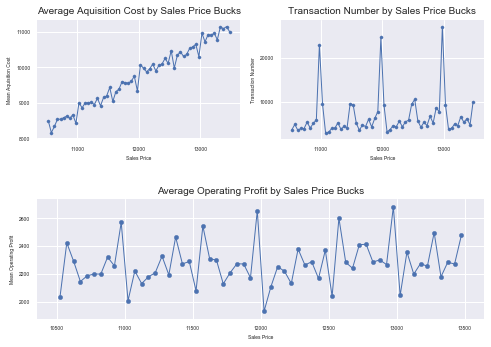

In [52]:
plt.style.use('seaborn')
plt.subplot(2, 2, 1)
x=fig_data['price_level']*50+10500+25
plt.plot(x,fig_data['aquisition_cost'],linewidth=1)
plt.scatter(x,fig_data['aquisition_cost'],s=10)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Sales Price',fontsize=5)
plt.ylabel('Mean Aquisition Cost',fontsize=5)
plt.title('Average Aquisition Cost by Sales Price Bucks',fontsize=10)

plt.subplot(2, 2, 2)
plt.subplots_adjust(wspace=0.2, hspace=None)
plt.plot(x,fig_data['vehicle_ID'],linewidth=1)
plt.scatter(x,fig_data['vehicle_ID'],s=10)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Sales Price',fontsize=5)
plt.ylabel('Transaction Number',fontsize=5)
plt.title('Transaction Number by Sales Price Bucks',fontsize=10)

plt.subplot(2, 1, 2)
plt.subplots_adjust(wspace=None, hspace=0.5)
plt.plot(x,fig_data['profit'],linewidth=1)
plt.scatter(x,fig_data['profit'],s=20)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Sales Price',fontsize=5)
plt.ylabel('Mean Operating Profit',fontsize=5)
plt.title('Average Operating Profit by Sales Price Bucks',fontsize=10)

plt.savefig(path+r"/profit34.pdf")
plt.show()


In [62]:
##task5
timedelta_mean=select['timedelta'].mean()
fig_data=fig_data.merge(timedelta_mean,on=['price_level','price_range'], how='outer')

(array([10000., 10500., 11000., 11500., 12000., 12500., 13000., 13500.,
        14000.]),
 <a list of 9 Text xticklabel objects>)

(array([32., 33., 34., 35., 36., 37., 38., 39.]),
 <a list of 8 Text yticklabel objects>)

Text(0.5, 0, 'Sales Price')

Text(0, 0.5, 'Mean Timedelta')

Text(0.5, 1.0, 'Average Time between Acquisition and Sale by Sales Price Bucks')

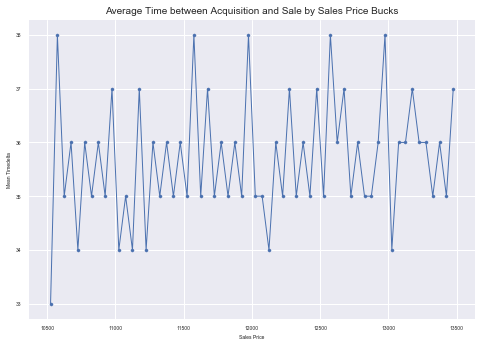

In [68]:
plt.style.use('seaborn')
x=fig_data['price_level']*50+10500+25
time=[t.days for t in fig_data['timedelta']]
plt.plot(x,time,linewidth=1)
plt.scatter(x,time,s=10)
plt.xticks(fontsize=5)
plt.yticks(fontsize=5)
plt.xlabel('Sales Price',fontsize=5)
plt.ylabel('Mean Timedelta',fontsize=5)
plt.title('Average Time between Acquisition and Sale by Sales Price Bucks',fontsize=10)

plt.savefig(path+r"/profit5.pdf")
plt.show()

In [101]:
y = df[ 'profit'] 
x = df['timedelta'].apply(lambda x: x.days)
x = sm.add_constant(x) 
model = sm.OLS(y, x).fit() 
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1464.
Date:                Tue, 28 Mar 2023   Prob (F-statistic):          1.27e-319
Time:                        20:52:28   Log-Likelihood:            -3.9226e+06
No. Observations:              394474   AIC:                         7.845e+06
Df Residuals:                  394472   BIC:                         7.845e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2696.5914     12.670    212.830      0.0

In [120]:
df['profit'].mean()

2321.4182447512444

In [102]:
dfoutput= summary_col([model,],stars=True,float_format='%0.2f',
                  model_names=['profit'],
                  info_dict={'N':lambda x: "{0:d}".format(int(x.nobs)),
                             'R2':lambda x: "{:.2f}".format(x.rsquared)})
print(dfoutput)


            profit  
--------------------
const     2696.59***
          (12.67)   
timedelta -10.28*** 
          (0.27)    
R-squared 0.00      
          0.00      
N         394474    
R2        0.00      
Standard errors in
parentheses.
* p<.1, ** p<.05,
***p<.01


In [105]:
print(dfoutput.as_latex())

\begin{table}
\caption{}
\begin{center}
\begin{tabular}{lc}
\hline
          &   profit    \\
\midrule
const     & 2696.59***  \\
          & (12.67)     \\
timedelta & -10.28***   \\
          & (0.27)      \\
R-squared & 0.00        \\
          & 0.00        \\
N         & 394474      \\
R2        & 0.00        \\
\hline
\end{tabular}
\end{center}
\end{table}
